In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy as np

In [138]:
plt.rcParams["figure.figsize"] = [10, 5]

In [139]:
file = "/Users/djpassey/Downloads/geom_prelim_data.pkl"

In [136]:
d1=pd.DataFrame(pd.read_pickle(file))
print(d1.shape)
print(d1.columns)

(3110450, 13)
Index(['mean_pred', 'mean_err', 'adj_size', 'topo_p', 'gamma', 'sigma',
       'spect_rad', 'ridge_alpha', 'remove_p', 'pred', 'err', 'net',
       'exp_num'],
      dtype='object')


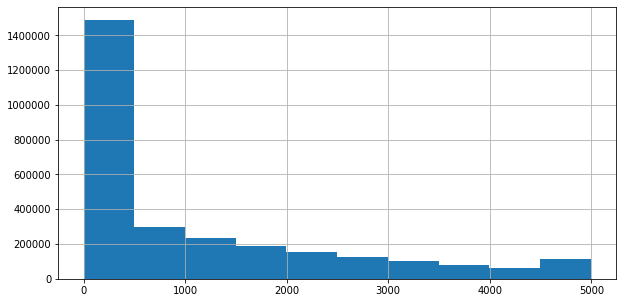

In [140]:
d1['mean_pred'].hist()

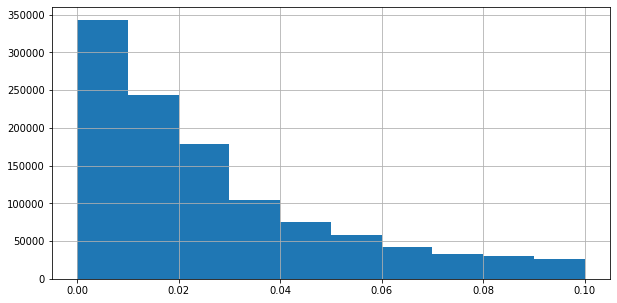

In [141]:
d1.loc[d1['mean_err']<0.1]['mean_err'].hist()

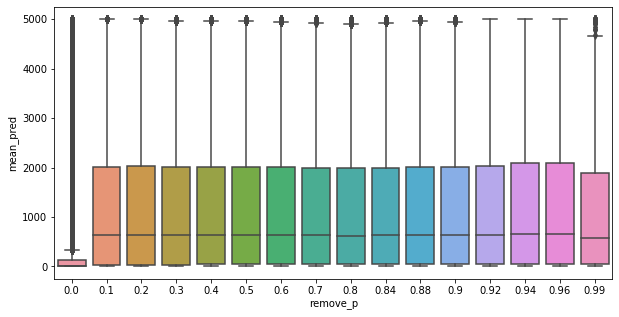

In [142]:
sb.boxplot(d1['remove_p'],d1['mean_pred'])

In [118]:
def sort_p_vals(p_vals, means):
    mask = np.argsort(p_vals)
    p_vals = p_vals[mask]
    means = np.array(means)[mask]
    return p_vals, means

In [119]:
p_vals=d1.remove_p.unique()
means=[]
for p in p_vals:
    means.append(np.round(d1.loc[d1['remove_p']==p]['mean_pred'].mean(),1))
    
mask = np.argsort(p_vals)
p_vals = p_vals[mask]
means = np.array(means)[mask]
print(p_vals)
print(means)

[0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.84 0.88 0.9  0.92 0.94
 0.96 0.99]
[1220.9 1220.5 1217.9 1211.8 1212.5 1215.3 1213.  1213.7 1208.7 1214.3
 1222.2 1223.8 1236.1 1260.6 1262.4 1179.5]


Text(0, 0.5, 'Average `pred` by remove_p')

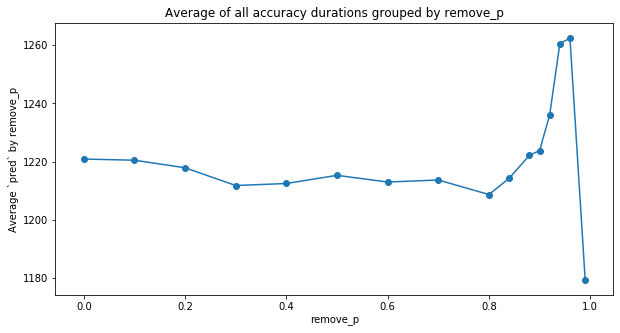

In [143]:
plt.plot(p_vals, means)
plt.scatter(p_vals, means)
plt.title('Average of all accuracy durations grouped by remove_p')
plt.xlabel('remove_p')
plt.ylabel('Average `pred` by remove_p')

In [144]:
p_vals=d1.remove_p.unique()
means_geom=[]
by_size=True
size=2500
pred_tol=3000

nsamples = 0
for p in p_vals:
    if not by_size:
        subset = d1.loc[(d1['remove_p']==p) & (d1['mean_pred']>pred_tol)]
        means_geom.append(np.round(subset['mean_pred'].mean(),1))
        nsamples += subset.shape[0]

    else:
        subset = d1.loc[(d1['remove_p']==p) & (d1['mean_pred']>pred_tol) & (d1['adj_size'] == size)]
        means_geom.append(np.round(subset['mean_pred'].mean (),1))
        nsamples += subset.shape[0]

        
p_vals, means_geom = sort_p_vals(p_vals, means_geom)

Num samples: 138947
Percent of data: 0.04467102830780112


Text(0, 0.5, 'Average `pred` by remove_p')

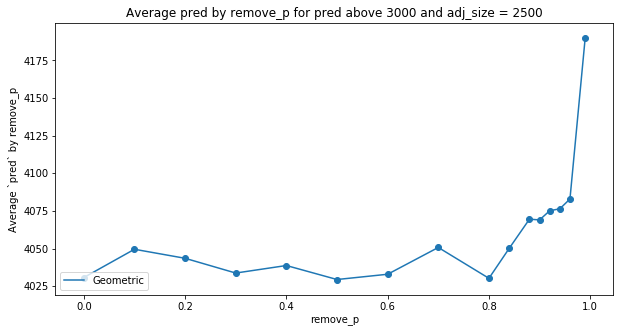

In [145]:
ntotal = d1.shape[0]
print(f"Num samples: {nsamples}")
print(f"Percent of data: {nsamples/ntotal}")
plt.plot(p_vals,np.array(means_geom),label='Geometric') 
plt.scatter(p_vals,np.array(means_geom))
# plt.ylim(500,1300)
plt.legend(loc='lower left')
if not by_size:
    plt.title(f'Average pred by remove_p for pred above {pred_tol} for all sizes')
else:
    plt.title(f'Average pred by remove_p for pred above {pred_tol} and adj_size = {size}')
plt.xlabel('remove_p')
plt.ylabel('Average `pred` by remove_p')

## Error

In [125]:
p_vals=d1.remove_p.unique()
means_geom=[]
by_size=False
size=2500
err_tol = .5

nsamples = 0

for p in p_vals:
    if not by_size:
        subset = d1.loc[(d1['remove_p']==p) & (d1['mean_err'] < err_tol)]
        means_geom.append(subset['mean_err'].mean())
        nsamples += subset.shape[0]
    else:
        subset = d1.loc[(d1['remove_p']==p) & (d1['mean_err'] < err_tol) & (d1['adj_size'] == size)]
        means_geom.append(subset['mean_err'].mean())
        nsamples += subset.shape[0]

p_vals, means_geom = sort_p_vals(p_vals, means_geom)

Num samples: 1269280
Percent of data: 45.37599428009652


Text(0, 0.5, 'Average `pred` by remove_p')

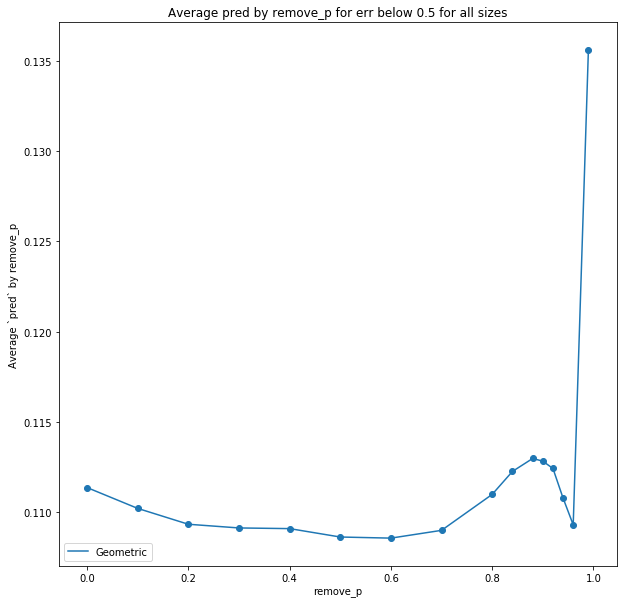

In [126]:
ntotal = d1.shape[0]
print(f"Num samples: {nsamples}")
print(f"Percent of data: {100 * nsamples / ntotal}")
plt.plot(p_vals,np.array(means_geom),label='Geometric') 
plt.scatter(p_vals,np.array(means_geom))
# plt.ylim(500,1300)
plt.legend(loc='lower left')
if not by_size:
    plt.title(f'Average pred by remove_p for err below {err_tol} for all sizes')
else:
    plt.title(f'Average pred by remove_p for err below {err_tol} and adj_size = {size}')
plt.xlabel('remove_p')
plt.ylabel('Average `pred` by remove_p')

## Find the Best Parameters

In [127]:
df_hyp = d1.groupby(d1['exp_num']).aggregate(np.mean)
best = df_hyp[df_hyp["mean_pred"] >= 4000]

In [128]:
df_hyp.describe()

,mean_pred,mean_err,adj_size,topo_p,gamma,sigma,spect_rad,ridge_alpha,remove_p
count,111890.000000,111890.000000,111890.000000,111890.000000,111890.000000,111890.000000,111890.000000,111890.000000,111890.000000
mean,1211.615297,2.633009,1530.547860,1.184118,3.095192,0.200448,2.508169,0.252700,0.588711
std,1232.724505,3.638460,812.386499,0.624877,3.475258,0.359996,3.384372,0.431675,0.318766
min,0.000000,0.004637,500.000000,0.500000,0.100000,0.001000,0.100000,0.000001,0.000000
25%,49.520000,0.053323,500.000000,0.500000,0.500000,0.005000,0.900000,0.000100,0.300000
50%,846.940000,0.518274,1500.000000,1.000000,1.000000,0.010000,1.000000,0.010000,0.700000
75%,2183.230000,4.559625,2500.000000,2.000000,5.000000,0.140000,2.000000,1.000000,0.880000
max,4995.000000,14.768774,2500.000000,2.000000,10.000000,1.000000,10.000000,1.000000,0.990000


In [129]:
best = df_hyp[df_hyp["mean_pred"] >= 4000]

In [130]:
best.describe()

,mean_pred,mean_err,adj_size,topo_p,gamma,sigma,spect_rad,ridge_alpha,remove_p
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,4272.415475,0.025782,1519.213974,1.072489,5.524716,0.271633,2.260611,0.008145,0.725284
std,294.824890,0.023301,805.128499,0.597550,3.363397,0.317462,3.308224,0.077926,0.305017
min,4001.520000,0.010731,500.000000,0.500000,0.100000,0.010000,0.100000,0.000001,0.000000
25%,4064.680000,0.016950,500.000000,0.500000,2.000000,0.140000,0.900000,0.000001,0.500000
50%,4154.640000,0.020071,1500.000000,1.000000,5.000000,0.140000,1.000000,0.000100,0.900000
75%,4345.480000,0.024653,2500.000000,2.000000,10.000000,0.140000,2.000000,0.000100,0.940000
max,4995.000000,0.265396,2500.000000,2.000000,10.000000,1.000000,10.000000,1.000000,0.990000


In [131]:
1145/124418

0.009202848462441127

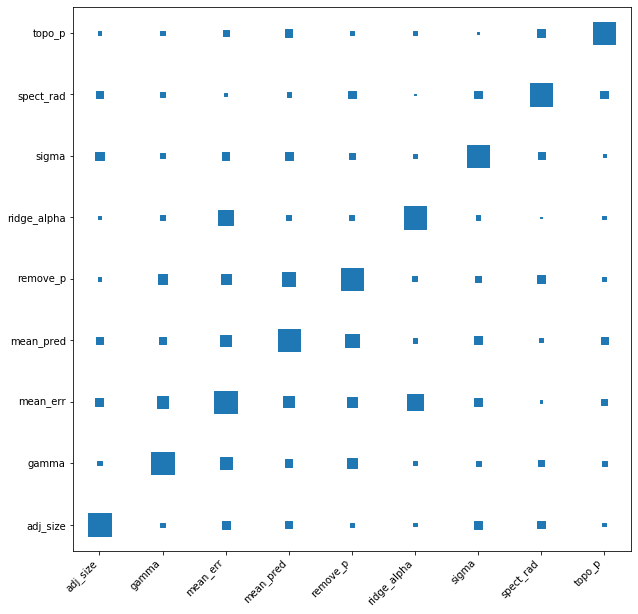

In [132]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
corr = pd.melt(best.corr().reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [76]:
import pickle
d = pickle.load(open(file, "rb"))

In [101]:
def where_eq(d, key, val):
    idx = np.where(np.array(d[key]) == val)[0]
    subset = dict()
    for k in d.keys():
        subset[k] = [d[k][i] for i in idx]
    return subset

def where_gtr(d, key, val):
    idx = np.where(np.array(d[key]) > val)[0]
    subset = dict()
    for k in d.keys():
        subset[k] = [d[k][i] for i in idx]
    return subset

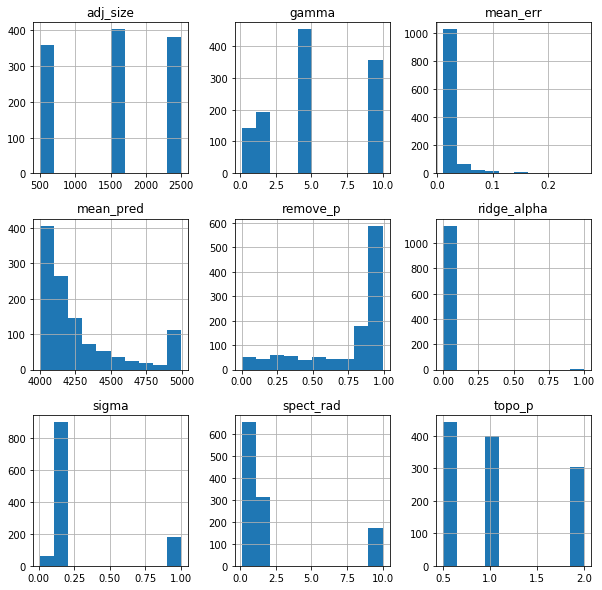

In [106]:
df_hyp = d1.groupby(d1['exp_num']).aggregate(np.mean)
best = df_hyp[df_hyp["mean_pred"] >= 4000]
best.hist()
plt.show()

In [157]:
df_hyp.describe()

,mean_pred,mean_err,adj_size,topo_p,gamma,sigma,spect_rad,ridge_alpha,remove_p
count,111890.000000,111890.000000,111890.000000,111890.000000,111890.000000,111890.000000,111890.000000,111890.000000,111890.000000
mean,1211.615297,2.633009,1530.547860,1.184118,3.095192,0.200448,2.508169,0.252700,0.588711
std,1232.724505,3.638460,812.386499,0.624877,3.475258,0.359996,3.384372,0.431675,0.318766
min,0.000000,0.004637,500.000000,0.500000,0.100000,0.001000,0.100000,0.000001,0.000000
25%,49.520000,0.053323,500.000000,0.500000,0.500000,0.005000,0.900000,0.000100,0.300000
50%,846.940000,0.518274,1500.000000,1.000000,1.000000,0.010000,1.000000,0.010000,0.700000
75%,2183.230000,4.559625,2500.000000,2.000000,5.000000,0.140000,2.000000,1.000000,0.880000
max,4995.000000,14.768774,2500.000000,2.000000,10.000000,1.000000,10.000000,1.000000,0.990000


In [146]:
p_vals=best.remove_p.unique()
means=[]
for p in p_vals:
    means.append(np.round(best.loc[best['remove_p']==p]['mean_pred'].mean(),1))
    
mask = np.argsort(p_vals)
p_vals = p_vals[mask]
means = np.array(means)[mask]
print(p_vals)
print(means)

[0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.84 0.88 0.9  0.92 0.94
 0.96 0.99]
[4142.7 4124.9 4124.9 4112.2 4121.6 4125.1 4124.3 4128.8 4114.2 4141.7
 4202.3 4247.2 4324.7 4386.2 4478.6 4684.6]


Text(0, 0.5, 'Average `pred` by remove_p')

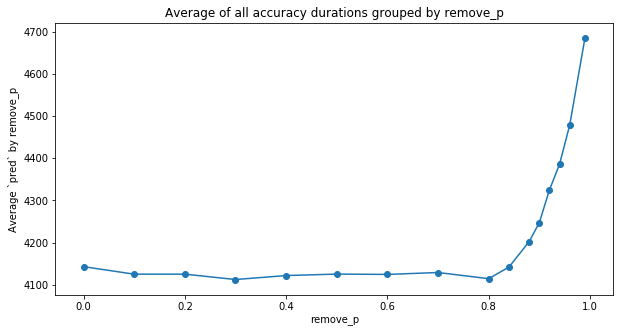

In [147]:
plt.plot(p_vals, means)
plt.scatter(p_vals, means)
plt.title('Average of all accuracy durations grouped by remove_p')
plt.xlabel('remove_p')
plt.ylabel('Average `pred` by remove_p')

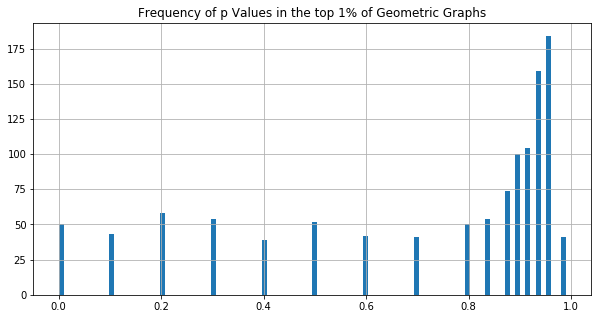

In [156]:
best["remove_p"].hist(bins=100)
plt.title("Frequency of p Values in the top 1% of Geometric Graphs")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1aca6074d0>,
      dtype=object)

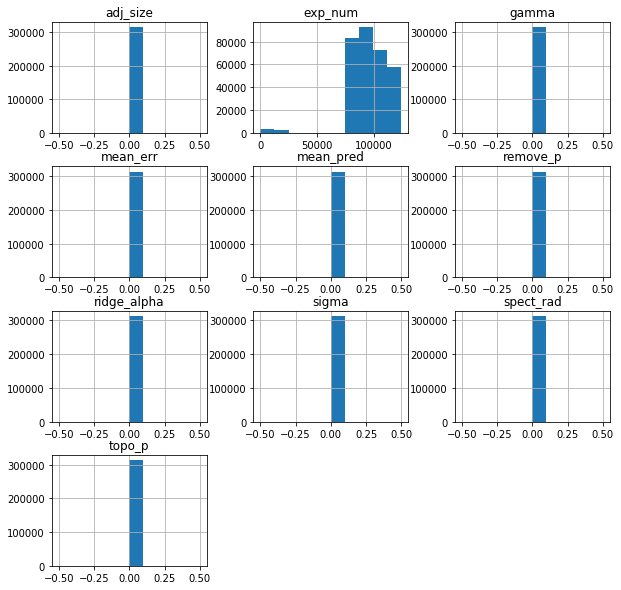

In [137]:
failed = d1.drop(index=d1[d1.sigma > 0].index) 
failed.hist()